<a href="https://colab.research.google.com/github/IvanDaniarAP/MLTask/blob/main/week5/EDA_HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
!pip install catboost


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('/content/Housing.csv')

In [10]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


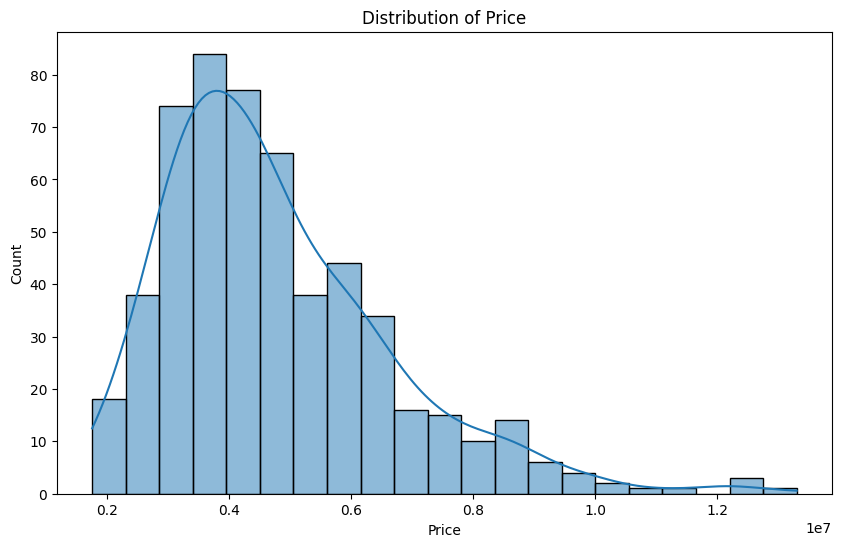

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Price")
plt.show()

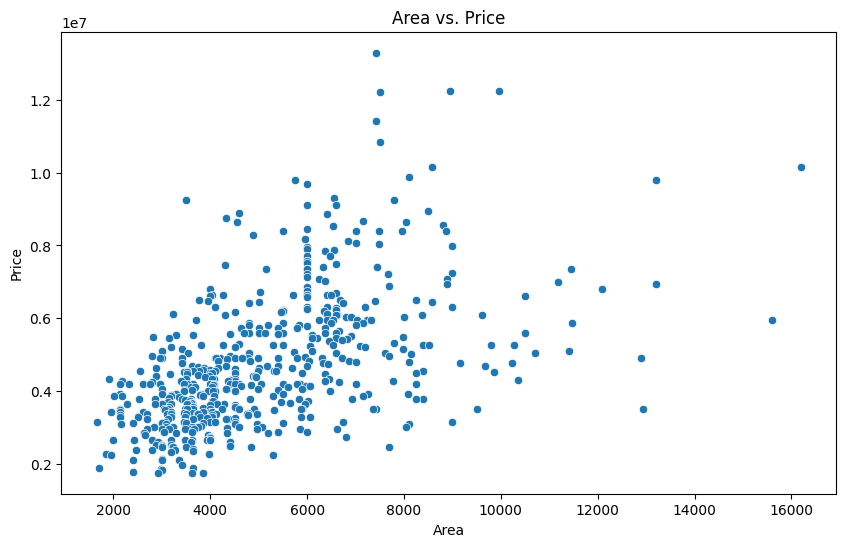

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="area", y="price", data=data)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price")
plt.show()

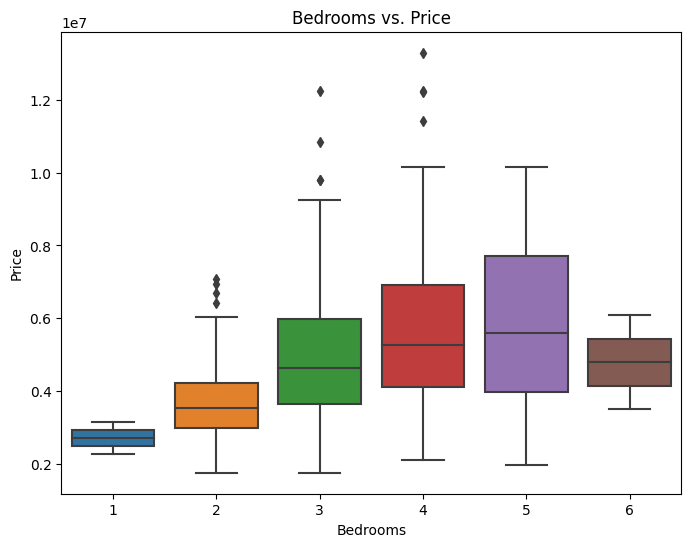

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=data)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

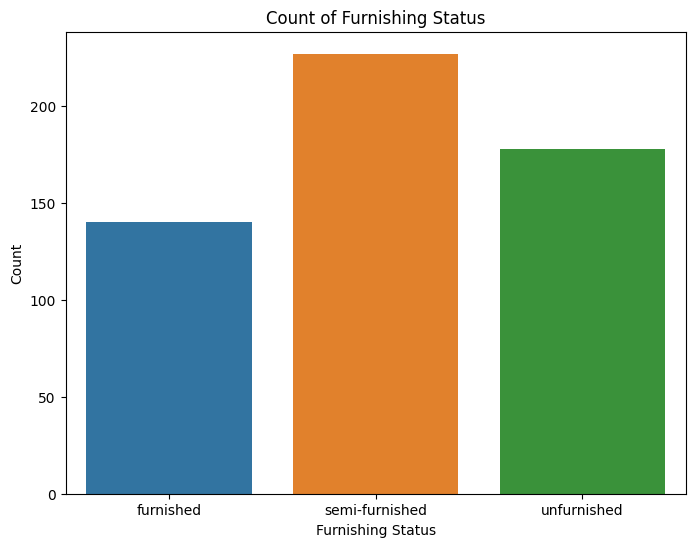

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="furnishingstatus", data=data)
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.title("Count of Furnishing Status")
plt.show()

<ipython-input-16-0d047630e175>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


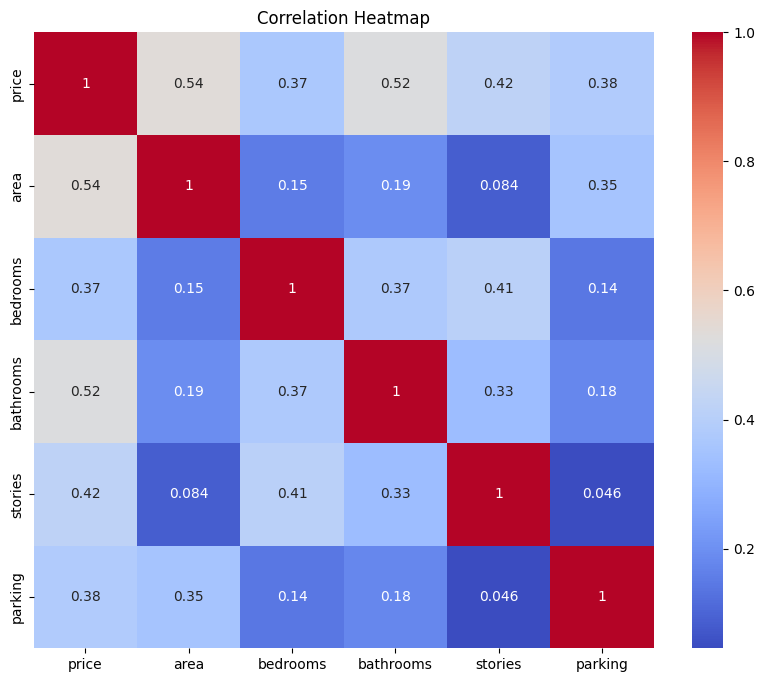

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

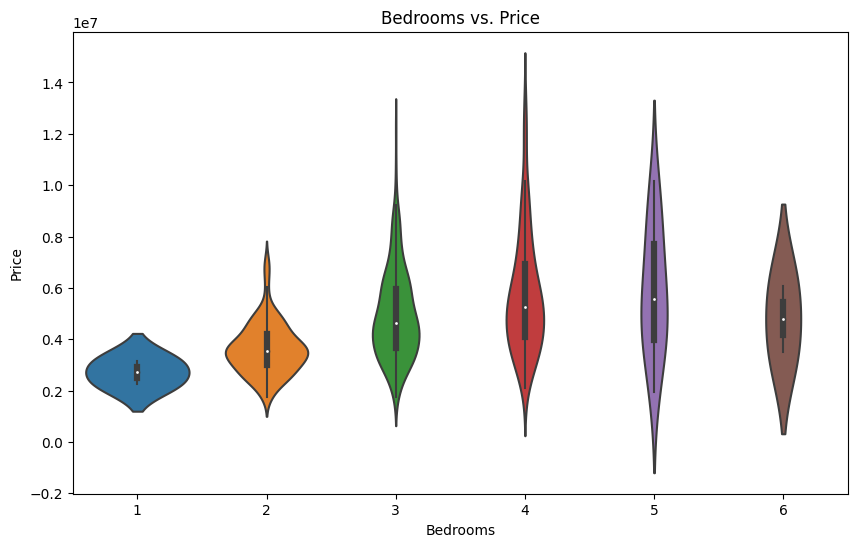

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="bedrooms", y="price", data=data)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

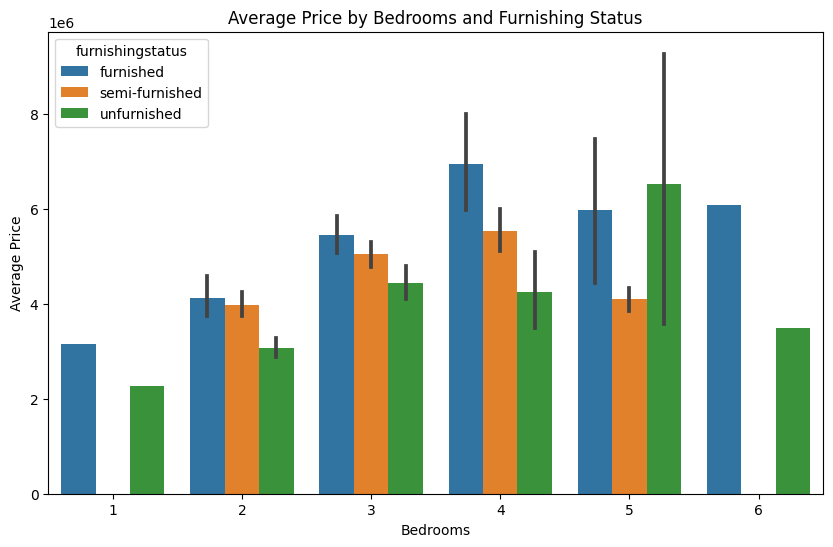

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x="bedrooms", y="price", hue="furnishingstatus", data=data)
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Bedrooms and Furnishing Status")
plt.show()

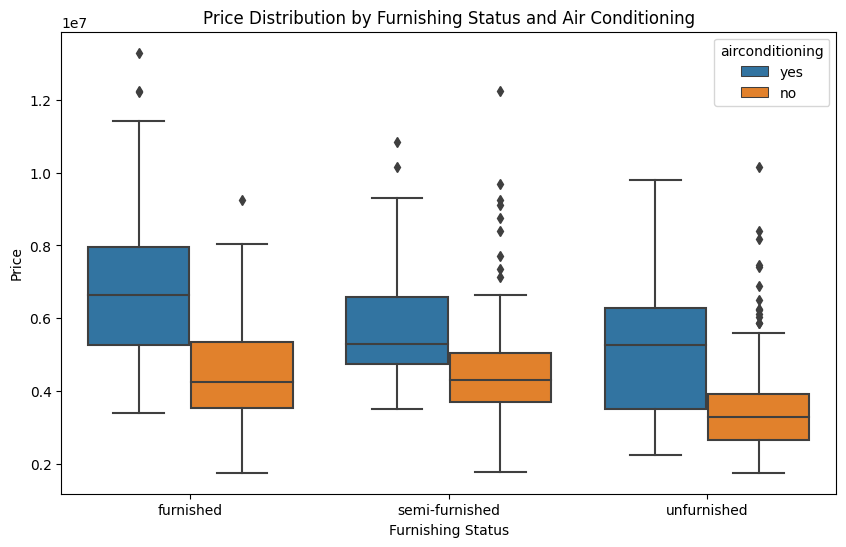

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="furnishingstatus", y="price", hue="airconditioning", data=data)
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.title("Price Distribution by Furnishing Status and Air Conditioning")
plt.show()

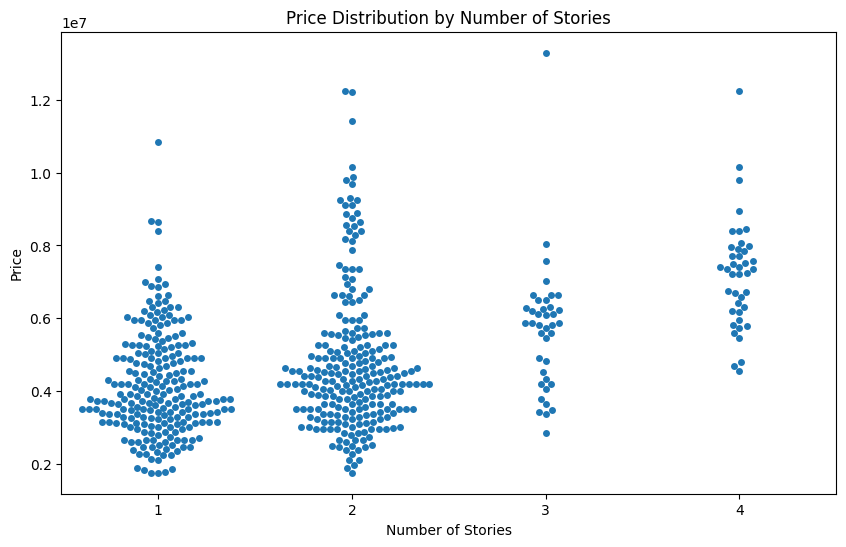

In [20]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="stories", y="price", data=data)
plt.xlabel("Number of Stories")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Stories")
plt.show()

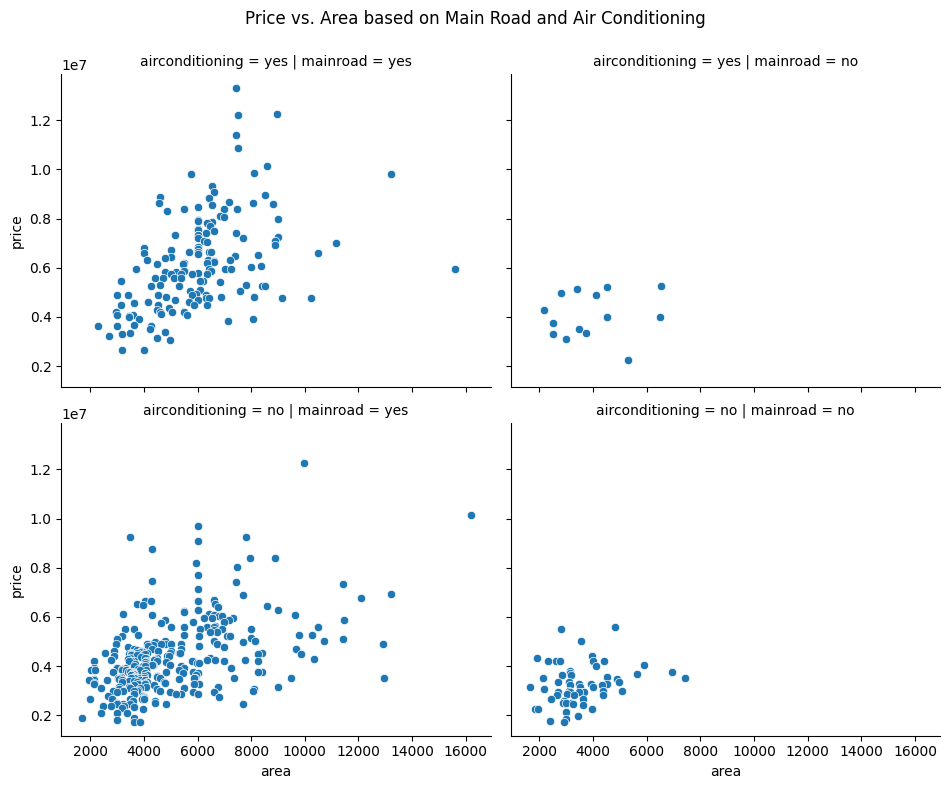

In [21]:
g = sns.FacetGrid(data, col="mainroad", row="airconditioning", height=4, aspect=1.2)
g.map(sns.scatterplot, "area", "price")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Price vs. Area based on Main Road and Air Conditioning")
plt.show()

In [22]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [23]:
furnishing_status_ohe = pd.get_dummies(data['furnishingstatus'], prefix='furnishing')
data = pd.concat([data, furnishing_status_ohe], axis=1)
data.drop('furnishingstatus', axis=1, inplace=True)

In [24]:
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [26]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 1754318687330.6638
Mean Absolute Error (MAE): 970043.4039201641
R-squared Score: 0.6529242642153184

Results for Decision Tree:
Mean Squared Error (MSE): 3030021316513.761
Mean Absolute Error (MAE): 1258201.8348623854
R-squared Score: 0.4005382913224004

Results for Random Forest:
Mean Squared Error (MSE): 1923079081318.004
Mean Absolute Error (MAE): 1011708.4358817533
R-squared Score: 0.6195365802457702

Results for SVR:
Mean Squared Error (MSE): 5567932621241.873
Mean Absolute Error (MAE): 1763890.3374061887
R-squared Score: -0.10156400047103098

Results for XGBoost:
Mean Squared Error (MSE): 2053120883932.489
Mean Absolute Error (MAE): 1053105.0435779816
R-squared Score: 0.5938090116739139

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [In

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


10:	learn: 1480880.8910180	total: 85.3ms	remaining: 7.67s
11:	learn: 1458308.6140459	total: 86.9ms	remaining: 7.16s
12:	learn: 1442360.0299126	total: 90.8ms	remaining: 6.89s
13:	learn: 1422282.4682125	total: 96.5ms	remaining: 6.8s
14:	learn: 1406471.4671199	total: 100ms	remaining: 6.58s
15:	learn: 1387327.8683450	total: 103ms	remaining: 6.32s
16:	learn: 1369616.7288126	total: 105ms	remaining: 6.09s
17:	learn: 1353724.1441514	total: 108ms	remaining: 5.89s
18:	learn: 1339740.3909624	total: 112ms	remaining: 5.78s
19:	learn: 1322711.3860053	total: 115ms	remaining: 5.61s
20:	learn: 1308324.4821321	total: 118ms	remaining: 5.49s
21:	learn: 1292171.1684139	total: 119ms	remaining: 5.29s
22:	learn: 1277624.5428458	total: 122ms	remaining: 5.19s
23:	learn: 1264129.9278620	total: 125ms	remaining: 5.09s
24:	learn: 1248979.3944885	total: 128ms	remaining: 5s
25:	learn: 1235735.0692036	total: 131ms	remaining: 4.91s
26:	learn: 1225214.5155377	total: 133ms	remaining: 4.79s
27:	learn: 1213618.5262649	tota

In [27]:
accuracy

[0.6529242642153184,
 0.4005382913224004,
 0.6195365802457702,
 -0.10156400047103098,
 0.5938090116739139,
 0.6188732571273148,
 0.6661573241928445,
 0.5745911233348547,
 0.3636367387949876,
 0.23398838601869698,
 0.6320091539639165]

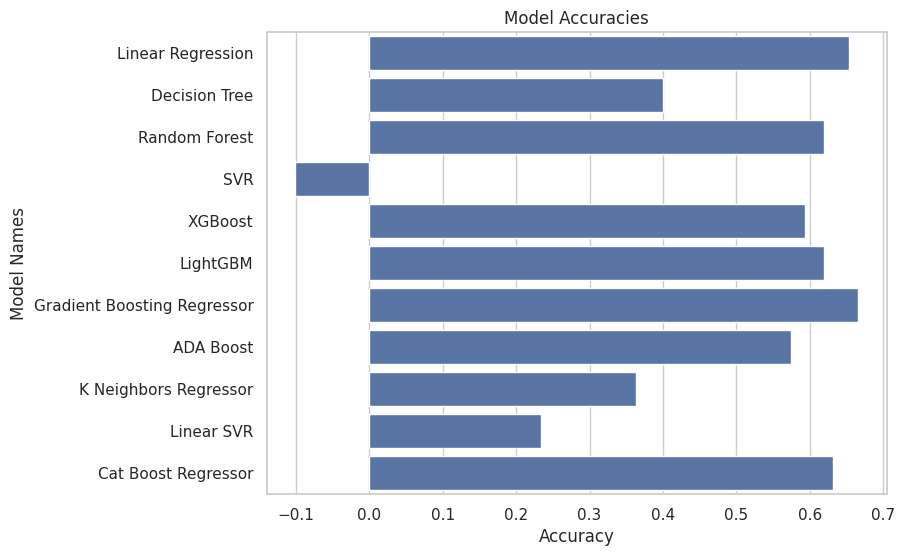

In [28]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()